In [1]:
# Import relevant packages
import sys
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

In [2]:
# Import data from provided files
Cab_Data = pd.read_csv("Documents\GitHub\DataSets\Cab_Data.csv", sep=",")
Transaction_ID = pd.read_csv("Documents\GitHub\DataSets\Transaction_ID.csv", sep=",")
Customer_ID = pd.read_csv("Documents\GitHub\DataSets\Customer_ID.csv", sep=",")
City = pd.read_csv("Documents\GitHub\DataSets\City.csv", sep=",")

In [3]:
# Merge files into an unified Data Frame
df = Cab_Data.merge(Transaction_ID, on="Transaction ID").merge(Customer_ID, on="Customer ID").merge(City, on="City")

In [ ]:
# Check for null values, duplicates, and dtypes for each column
df.isnull().sum()
df.duplicated().sum()
df.dtypes

In [4]:
# Convert Population, and Users to float type (beware null values)
df["Population"] = df["Population"].str.replace(",", "")
df["Population"] = pd.to_numeric(df["Population"])
df["Users"] = df["Users"].str.replace(",", "")
df["Users"] = pd.to_numeric(df["Users"])

In [ ]:
# Identify the date origin to transform from Excel date format to datetime format
print(datetime.date(1900,1,28)+datetime.timedelta(days=42371))

In [6]:
# Create column with dates in datetime format
df["Date"] = pd.to_datetime(df["Date of Travel"], unit="d", origin="1900-1-28")

In [7]:
# Create Profit column
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]

In [8]:
# Create the Profit Margin column
df["Profit Margin"] = df["Profit"]/df["Price Charged"]

In [ ]:
# Plot Number of Customers covered by each Company (both in the total time-period and by year) (Hypothesis 1)

# Total time-period
df["Company"].value_counts().plot(kind="bar", title="Number of Customers covered by Company (2016-01-31 to 2019-01-29)", color=["yellow", "pink"])
plt.ylabel("# of Customers")
plt.xlabel("Company")
plt.show()

In [ ]:
# By year
df["Company"].groupby(df["Date"].dt.year).value_counts().plot(kind="bar", title="Number of Customers by year (for each Company)", color=["yellow", "pink"])
plt.ylabel("# of Customers")
plt.xlabel("Year, Company")
plt.show()

In [38]:
# Hypothesis testing for Hypothesis 1: One company has provided Cab services to more Customers than the other
Pink_data = df[df.Company == "Pink Cab"]
Yellow_data = df[df.Company == "Yellow Cab"]
scipy.stats.binom_test(Pink_data["Company"].count(), df["Company"].count())

# Given that the Null Hypothesis is that the 2 Companies are equally likeky to occur, we can conclude that the Binomial Test (p<0.05) 
# supports the Alternative Hypothesis, that is, that the 2 Companies are not equally likely to occur (in other words, the Pink Cab Company
# has attended a number of customers significantly lower than the Yellow Cab Company)

2e-323

In [ ]:
# Plot Number of Customers per City for each Company
grouped_city = df.groupby(["Company", "City"])
grouped_city_table = pd.crosstab(index=df["City"], columns = df["Company"])
grouped_city_table.plot(kind="bar", title="Number of Customers per City for each Company", stacked=True, color=["pink", "yellow"])

In [ ]:
# Plot the Profit mean for each Company (both in total period and by year) (Hypothesis 2)

# Total time-period
df["Profit"].groupby(df["Company"]).describe()["mean"].plot(kind="bar", title="Average Profit (2016-01-31 to 2019-01-29)", 
                                                            color=["pink", "yellow"])
plt.ylabel("Profit Mean")
plt.xlabel("Company")
plt.show()

In [ ]:
# By year
df["Profit"].groupby([df["Company"], df["Date"].dt.year]).describe()["mean"].plot(kind="bar", title="Average Profit by Year", 
                                                                                  color=["pink", "pink", "pink", "pink", 
                                                                                         "yellow", "yellow", "yellow", "yellow"])
plt.ylabel("Profit Mean")
plt.xlabel("Company, Year")
plt.show()

In [ ]:
# Hypothesis testing for Hypothesis 2: One company has a higher profit than the other.
scipy.stats.ttest_ind(Yellow_data["Profit"], Pink_data["Profit"], equal_var=False)

In [ ]:
# Plot the Profit Margin mean for each Company (both in total period and by year) (Hypothesis 3)
df["Profit Margin"].groupby(df["Company"]).describe()["mean"].plot(kind="bar", title="Profit Margin (2016-01-31 to 2019-01-29)", color=["pink", "yellow"])
plt.ylabel("Profit Margin (% of the sale that was profit)")
plt.xlabel("Company")
plt.show()

In [ ]:
df["Profit Margin"].groupby([df["Company"], df["Date"].dt.year]).describe()["mean"].plot(kind="bar", title="Profit Margin by Year",
                                                                                        color=["pink", "pink", "pink", "pink", 
                                                                                         "yellow", "yellow", "yellow", "yellow"])
plt.ylabel("Profit Margin (% of the sale that was profit)")
plt.xlabel("Year, Company")
plt.show()

In [ ]:
# Plot relation of Profit Margin to Number of Customers (Hypothesis 3)
grouped = df.groupby(df["Company"])
plt.scatter(grouped["Profit Margin"].describe()["count"], grouped["Profit Margin"].describe()["mean"])
plt.plot(grouped["Profit Margin"].describe()["count"], grouped["Profit Margin"].describe()["mean"])
plt.xlabel("# of Customers")
plt.ylabel("Profit Margin")
plt.title("Relationship Between Profit Margin and Number of Customers")
plt.show()
# Here, we can see an increase of profit margin proportional to an increase in the number of customers. 

In [ ]:
# Explore Customer attributes for diferent segments of the sample (Hypothesis 4)

# Frequency of Payment Mode
df.groupby([df["Company"], df["Payment_Mode"]])["Customer ID"].count().plot(kind="bar", title="Frequency of Payment Mode", 
                                                                            color=["pink", "pink", "yellow", "yellow"])
plt.ylabel("Count")
plt.xlabel("Company, Payment Mode")
plt.show()

In [ ]:
# Number of Customers by Gender
df.groupby([df["Company"], df["Gender"]])["Customer ID"].count().plot(kind="bar", title="Number of Customers by Gender", 
                                                                            color=["pink", "pink", "yellow", "yellow"])
plt.ylabel("Count")
plt.xlabel("Company, Gender")
plt.show()

In [ ]:
# Plot Distribution of Customers by Age
df["Age"].hist(bins=9, grid=False, width=5)
plt.title("Distribution of Customers by their Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Plot Distribution of Customers by Income
df["Income (USD/Month)"].hist(grid=False)
plt.title("Distribution of Customers by their Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Explore KM Travelled

# Plot total KM Travelled by each Company
df["KM Travelled"].groupby(df["Company"]).sum().plot(kind="bar", title="KM Travelled by each Company", color=["pink", "yellow"])
plt.ylabel("Total KM Travelled (2016-01-31 to 2019-01-29)")
plt.show()

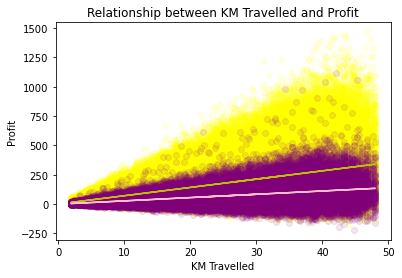

In [61]:
# Plot Regression Line describing the relationship between KM Travelled and Profit (Hypothesis 5)
plt.scatter(Yellow_data["KM Travelled"], Yellow_data["Profit"], alpha=0.1, color="yellow")
m, b1 = np.polyfit(Yellow_data["KM Travelled"], Yellow_data["Profit"], 1)
plt.plot(Yellow_data["KM Travelled"], m*Yellow_data["KM Travelled"]+b1, color="y")
plt.scatter(Pink_data["KM Travelled"], Pink_data["Profit"], alpha=0.1, color="purple")
m, b2 = np.polyfit(Pink_data["KM Travelled"], Pink_data["Profit"], 1)
plt.plot(Pink_data["KM Travelled"], m*Pink_data["KM Travelled"]+b2, color="pink")
plt.title("Relationship between KM Travelled and Profit")
plt.xlabel("KM Travelled")
plt.ylabel("Profit")
plt.show()
# In this case, the slope for the Yellow Cab Company predicts a higher profit for each increase in KM Travelled. 
# Slopes for each group can be accesed with b1 for Yellow Cab and b2 for Pink Cab

-0.6944430460730975


In [36]:
df["Cost of Trip"].groupby(df["Company"]).describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,248.148682,135.403345,19.0,131.868,246.330,360.180,576.0
Yellow Cab,274681.0,297.922004,162.548986,22.8,158.400,295.596,432.432,691.2
